In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_ws_with_embedding(n=50, k=4, p=0.1, space_size=100):
    """
    生成 WS 小世界网络（Watts–Strogatz model），并进行二维嵌入。
    参数:
        n: 节点数量
        k: 每个节点初始连接的最近邻个数（必须是偶数）
        p: 重连概率
        space_size: 节点坐标范围（二维空间大小）
    返回:
        G: networkx 图对象
        positions: 节点位置字典 {节点: (x, y)}
    """
    # 1. 生成 WS 小世界网络
    G = nx.watts_strogatz_graph(n=n, k=k, p=p)

    # 2. 随机二维嵌入坐标
    positions = {i: np.random.rand(2) * space_size for i in G.nodes()}
    nx.set_node_attributes(G, positions, 'pos')

    # 3. 为每条边添加欧几里得距离作为权重
    for u, v in G.edges():
        dist = np.linalg.norm(positions[u] - positions[v])
        G[u][v]['weight'] = dist

    return G, positions

In [3]:
def plot_ws_network(G, positions, n, k, p):
    """
    绘制 WS 网络图，并标注参数信息
    """
    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        pos=positions,
        with_labels=True,
        node_color='skyblue',
        node_size=300,
        edge_color='gray',
        width=1.5
    )
    plt.title(f"WS Small-World Network (n={n}, k={k}, p={p})", fontsize=14)
    plt.axis('equal')
    plt.show()

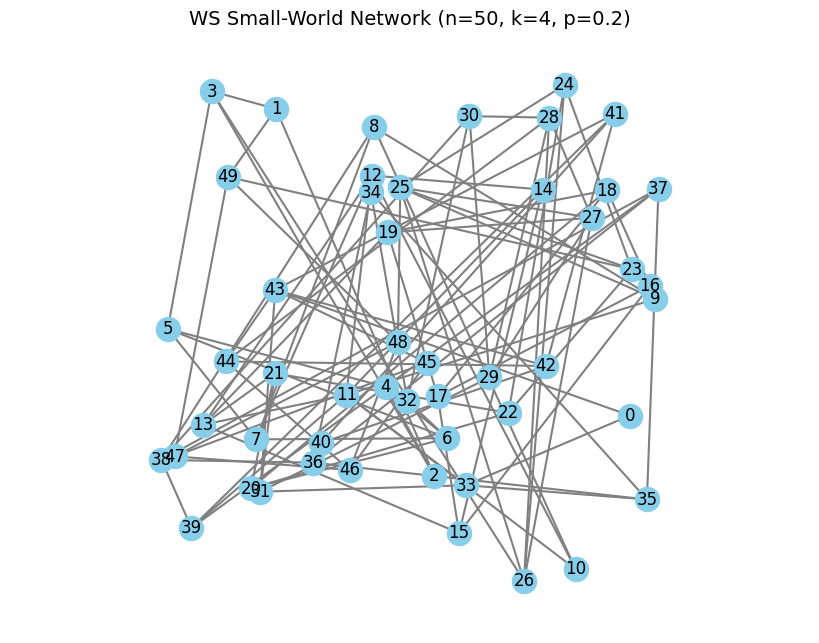

In [4]:

# 🔧 使用示例
n = 50    # 节点数
k = 4     # 环状最近邻连接数（必须为偶数）
p = 0.2   # 重连概率

G_ws, pos_ws = generate_ws_with_embedding(n=n, k=k, p=p)
plot_ws_network(G_ws, pos_ws, n=n, k=k, p=p)

In [5]:
def abundance_index(G):
    return sum(dict(G.degree()).values())

# 生成 WS 网络
n = 50   # 节点数
k = 4    # 每个节点初始连接最近邻（必须为偶数）
p = 0.1  # 重连概率

G_ws = nx.watts_strogatz_graph(n=n, k=k, p=p)

# 计算丰度 A
A = abundance_index(G_ws)
print(f"WS Network Abundance A = {A}")

WS Network Abundance A = 200


In [6]:
def node_weight_sums(G):
    """
    计算每个节点相邻边的权重之和。
    返回格式：{节点编号: 权重和}
    """
    weight_sum = {}
    for node in G.nodes():
        total = 0
        for neighbor in G.neighbors(node):
            total += G[node][neighbor]['weight']
        weight_sum[node] = total
    return weight_sum




In [7]:
# 打印前几个节点的加权度

# 🧪 使用示例（基于你生成的 G_ws）
weight_sums_ws = node_weight_sums(G_ws)
for node, total_weight in list(weight_sums_ws.items())[:10]:
    print(f"Node {node}: total edge weight = {total_weight:.2f}")

KeyError: 'weight'